In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
import scipy as sp
import re

In [141]:
pd.set_option('display.max_rows', None)

In [168]:
df=pd.read_csv('./Ad_cost_traffic.csv',encoding='euc-kr')
df.head(20)

,분류1,분류2,서비스분류1,종류1,종류2,년,월,값
0,PC,종합,프런트,트래픽,UV,2018,9,12442693.0
1,PC,종합,프런트,트래픽,PV,2018,9,499468949.0
2,PC,종합,프런트,트래픽,일평균방문횟수,2018,9,16111902.0
3,PC,종합,프런트,트래픽 평균단가,UV,2018,9,71.0
4,PC,종합,프런트,트래픽 평균단가,PV,2018,9,2.0
5,PC,종합,프런트,매출 구분,직접광고,2018,9,354009020.0
6,PC,종합,프런트,매출 구분,네트워크,2018,9,59873778.0
7,PC,종합,프런트,매출 구분,쇼핑,2018,9,463578266.0
8,PC,종합,프런트,매출 구분,제휴,2018,9,NaN
9,PC,종합,프런트,매출 구분,총매출,2018,9,877461064.0


In [170]:
data=df[(df['분류1']=='PC')&(df['분류2']=='종합')&(df['서비스분류1']=='프런트')&(df['종류1']=='트래픽')&(df['종류2']=='PV')][['년','월','분류1','분류2','서비스분류1','종류1','종류2','값']]
data

,년,월,분류1,분류2,서비스분류1,종류1,종류2,값
1,2018,9,PC,종합,프런트,트래픽,PV,499468949.0
505,2018,10,PC,종합,프런트,트래픽,PV,561194125.0
1009,2018,11,PC,종합,프런트,트래픽,PV,558074008.0
1513,2018,12,PC,종합,프런트,트래픽,PV,551426931.0
2017,2019,1,PC,종합,프런트,트래픽,PV,575578560.0
2521,2019,2,PC,종합,프런트,트래픽,PV,488203262.0
3025,2019,3,PC,종합,프런트,트래픽,PV,558670136.0
3529,2019,4,PC,종합,프런트,트래픽,PV,556896816.0
4033,2019,5,PC,종합,프런트,트래픽,PV,556968512.0
4537,2019,6,PC,종합,프런트,트래픽,PV,528776273.0


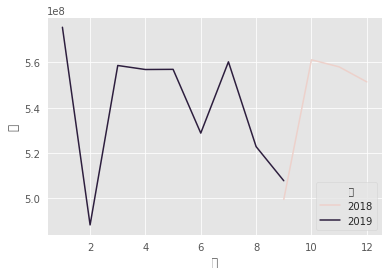

In [175]:
sns.lineplot(x='월', y='값',markers=True,dashes=False, hue='년',data=data)
plt.show()

In [151]:
pd.pivot_table(df, index=['년','월','분류1','서비스분류1'], columns=['종류1','종류2'],values='값' ).head(30)

종류1                       매출 구분                                          \
종류2                        네트워크           쇼핑            제휴         직접광고   
년    월  분류1 서비스분류1                                                        
2018 9  PC  TV        3162045.0          NaN  4.655666e+06          NaN   
            검색              NaN          NaN  8.567965e+08          NaN   
            기사박스     44982900.0          NaN           NaN          NaN   
            뉴스       16182773.0    6530109.0           NaN     500000.0   
            스푼피드            NaN          NaN  5.509720e+05          NaN   
            여행         360666.0          NaN  2.786400e+05          NaN   
            이글루스      1424793.0          NaN           NaN          NaN   
            자동차       1773949.0          NaN  1.917000e+06          NaN   
            증권정보            NaN          NaN  9.163420e+05          NaN   
            코인         240849.0          NaN           NaN     500000.0   
            프런트      59873778.0  460313212.0           NaN  354009020.0   
            허브       10295417.0          NaN           NaN          NaN   
        모바일 TV              NaN          NaN           NaN          NaN   
            검색              NaN          NaN  5.164750e+06          NaN   
            뉴스        3825059.0          NaN           NaN          NaN   
            스푼피드            NaN          NaN           NaN          NaN   
            이글루스(앱)         NaN          NaN           NaN          NaN   
            코인          23504.0          NaN           NaN          NaN   
            프런트         32958.0          NaN           NaN          NaN   
            허브         781282.0          NaN           NaN          NaN   
     10 PC  TV        4075632.0          NaN  8.632268e+06          NaN   
            검색              NaN          NaN  1.000944e+09          NaN   
            기사박스     48998390.0   17900888.0           NaN          NaN   
            뉴스       17609344.0    7607826.0           NaN          NaN   
            스푼피드            NaN          NaN  6.135580e+05          NaN   
            여행         352707.0          NaN  2.941180e+05          NaN   
            이글루스      1411672.0          NaN           NaN          NaN   
            자동차       1781740.0          NaN  1.020000e+06          NaN   
            증권정보            NaN          NaN  8.069320e+05          NaN   
            코인         327208.0          NaN           NaN          NaN   

종류1                               매출 비중                         트래픽  \
종류2                           총매출  네트워크   쇼핑   제휴 직접광고           PV   
년    월  분류1 서비스분류1                                                    
2018 9  PC  TV       7.817711e+06   0.0  NaN  1.0  NaN    5772085.0   
            검색       8.567965e+08   NaN  NaN  1.0  NaN   61786414.0   
            기사박스     4.498290e+07   1.0  NaN  NaN  NaN   44933353.0   
            뉴스       1.994783e+07   1.0  0.0  NaN  0.0   11219034.0   
            스푼피드     5.509720e+05   NaN  NaN  1.0  NaN     317732.0   
            여행       6.393060e+05   1.0  NaN  0.0  NaN     145650.0   
            이글루스     1.424793e+06   1.0  NaN  NaN  NaN    9117345.0   
            자동차      3.690949e+06   0.0  NaN  1.0  NaN     611815.0   
            증권정보     9.163420e+05   NaN  NaN  1.0  NaN     180912.0   
            코인       7.408490e+05   0.0  NaN  NaN  1.0     168307.0   
            프런트      8.741960e+08   0.0  1.0  NaN  0.0  499468949.0   
            허브       1.029542e+07   1.0  NaN  NaN  NaN    8119701.0   
        모바일 TV                NaN   NaN  NaN  NaN  NaN      54122.0   
            검색       5.164750e+06   NaN  NaN  1.0  NaN    3776020.0   
            뉴스       3.825059e+06   1.0  NaN  NaN  NaN   10256215.0   
            스푼피드              NaN   NaN  NaN  NaN  NaN        959.0   
            이글루스(앱)           NaN   NaN  NaN  NaN  NaN   12205438.0   
            코인       2.350400e+04   1.0  NaN  NaN  NaN      34246.0   
            프런트      3.295800e+04

In [121]:
df['PV']=df[(df['종류2']=='PV')&(df['종류1']=='트래픽')]['값']
df['UV']=df[(df['종류2']=='UV')&(df['종류1']=='트래픽')]['값']
df['Ad_type'] = df[df['종류1']=='매출 구분']['종류2']
df['sales']=df[(df['종류2']=='직접광고')|(df['종류2']=='네트워크')|(df['종류2']=='쇼핑')|(df['종류2']=='제휴')]['값']
df=df.drop(['종류1','종류2','값'], axis=1)
df=df.rename(columns={'분류1':'device','분류2':'shopping_type','서비스분류1':'service','년':'year','월':'month'})

In [117]:
df.shape

(6552, 9)

In [124]:
df.head(30)

,device,shopping_type,service,year,month,PV,UV,Ad_type,sales
0,PC,종합,프런트,2018,9,NaN,12442693.0,NaN,NaN
1,PC,종합,프런트,2018,9,499468949.0,NaN,NaN,NaN
2,PC,종합,프런트,2018,9,NaN,NaN,NaN,NaN
3,PC,종합,프런트,2018,9,NaN,NaN,NaN,NaN
4,PC,종합,프런트,2018,9,NaN,NaN,NaN,NaN
5,PC,종합,프런트,2018,9,NaN,NaN,직접광고,354009020.0
6,PC,종합,프런트,2018,9,NaN,NaN,네트워크,59873778.0
7,PC,종합,프런트,2018,9,NaN,NaN,쇼핑,463578266.0
8,PC,종합,프런트,2018,9,NaN,NaN,제휴,NaN
9,PC,종합,프런트,2018,9,NaN,NaN,총매출,NaN


In [118]:
pd.concat([df['PV'].dropna().reset_index(drop=True),df['UV'].dropna().reset_index(drop=True),df['']],axis=1)

,PV,UV
0,499468949.0,12442693.0
1,61786414.0,5202366.0
2,44933353.0,2436455.0
3,11219034.0,1259759.0
4,8119701.0,1552426.0
...,...,...
403,979866.0,852697.0
404,1007.0,1734.0
405,8195492.0,328773.0
406,NaN,396.0
